# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [174]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 27.5MB/s]


Начнем с необходимых приготовлений.

In [175]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [176]:
coins = pd.read_csv('coins.csv')
coins.set_index('date', drop=False, inplace=True)

coins.index.name = 'datetime'


Посмотрим что получилось

In [ ]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
# Paste your code here
sequence = pd.Series(data=coins['symbol'], index=None)
print(f"Количество монет: {sequence.unique().size}")

Количество монет: 66


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
# # Paste your code here
# print(coins.head(1)['date'])
# print(coins.tail(1)['date'])
#coins['date'] = pd.to_datetime(coins['date'])

# Нахождение минимальной и максимальной даты в DataFrame
start_date = coins['date'].min()
end_date = coins['date'].max()

print(f"Период данных: с {start_date} по {end_date}")


Период данных: с 2013-04-28 по 2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
# Paste your code here
null_counts = coins.isnull().sum()
# Количество пропусков в каждой колонке
print(null_counts)

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64


price: Пропуски могут возникнуть из-за отсутствия данных на определенные даты. Например, если для какой-то монеты нет торговли в определенный день, то цена может остаться неопределенной.

txCount и activeAddresses: Пропуски могут быть вызваны тем, что не для всех монет доступны данные по количеству транзакций или активных адресов в сети.

txVolume: Пропуски могут быть связаны с тем, что объем транзакций не был зафиксирован для определенных монет в конкретные дни.

In [298]:
missing_data = coins[coins['price'].isnull() | coins['txCount'].isnull() | coins['txVolume'].isnull() | coins['activeAddresses'].isnull()]
missing_data

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2014-08-05,2014-08-05,0.002976,NaN,NaN,NaN,XLM,Stellar,0.002976,0.003387,0.002349,0.002440,3.031600e+04,7.725970e+05
2014-08-06,2014-08-06,0.002373,NaN,NaN,NaN,XLM,Stellar,0.002373,0.003402,0.002266,0.002657,3.582000e+04,7.465540e+05
2014-08-07,2014-08-07,0.002686,NaN,NaN,NaN,XLM,Stellar,0.002686,0.003042,0.002455,0.002501,1.428640e+05,9.769420e+05
2014-08-08,2014-08-08,0.002493,NaN,NaN,NaN,XLM,Stellar,0.002493,0.003243,0.002493,0.002881,9.370800e+04,1.075820e+06
2014-08-09,2014-08-09,0.002884,NaN,NaN,NaN,XLM,Stellar,0.002884,0.003710,0.002873,0.003481,2.335790e+05,1.261300e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-04,2018-06-04,NaN,847.0,NaN,698.0,VEN,VeChain,4.060000,4.170000,3.830000,3.890000,9.283970e+07,2.135810e+09
2018-06-05,2018-06-05,13.580000,NaN,NaN,NaN,EOS,EOS,13.580000,14.230000,12.970000,14.200000,1.445140e+09,1.217170e+10
2018-06-05,2018-06-05,NaN,632.0,NaN,588.0,VEN,VeChain,3.890000,4.150000,3.800000,4.090000,8.376190e+07,2.047090e+09


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
# Paste your code here
coins['name'][coins['price'] == coins['price'].max()].values.tolist()

['Bitcoin']

### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

In [ ]:
# Paste your code here
# 1. To find the mean of market for each coin
average_market = coins.groupby('symbol')['market'].mean()
# 2. Display max and min
highest_market = average_market.idxmax()
lowest_market = average_market.idxmin()

highest_market_val = average_market.max()
lowest_market_val = average_market.min()

print(f"Самая высокая средняя капитализация {highest_market}: {highest_market_val}")
print(f"Самая низкая средняя капитализация {lowest_market}: {lowest_market_val}")

Самая высокая средняя капитализация BTC: 30782136351.01822
Самая низкая средняя капитализация VTC: 28203506.20262664


<Axes: ylabel='market'>

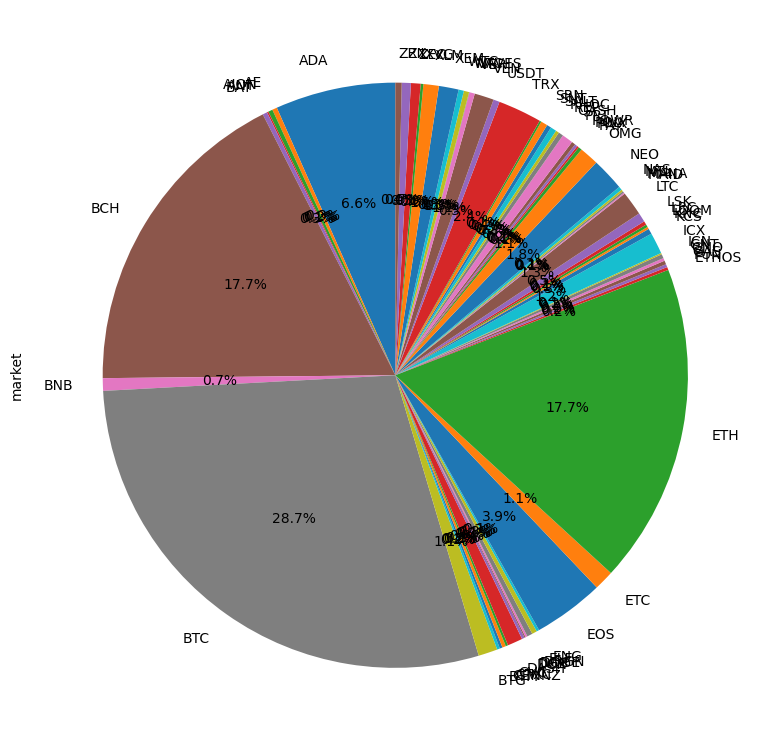

In [ ]:
average_market.plot.pie(figsize=(18,9.5),labels=average_market.index, autopct='%1.1f%%', startangle=90)
# как сделать красиво и чтобы не перекрывались ¯\_(ツ)_/¯

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [ ]:
import matplotlib.dates as mdates

def plot_fancy_price_action(coins, symbol, start_date, end_date):
  # Paste your code here
  # Фильтруем данные для выбранной валюты и диапазона дат
  selected_coin_data = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)].copy()

  # Преобразовываем столбец с датами в формат matplotlib.dates
  selected_coin_data['date'] = pd.to_datetime(selected_coin_data['date'])
  selected_coin_data['date'] = selected_coin_data['date'].apply(mdates.date2num)

  # Построение графика
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.xaxis_date()
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  # Построение свечного графика вручную
  ax.bar(selected_coin_data['date'], selected_coin_data['close'] - selected_coin_data['open'],
         width=0.8, bottom=selected_coin_data['open'], color='r', align='center', edgecolor='k')

  ax.bar(selected_coin_data['date'], selected_coin_data['high'] - selected_coin_data['close'],
         width=0.2, bottom=selected_coin_data['close'], color='g', align='center', edgecolor='k')

  ax.bar(selected_coin_data['date'], selected_coin_data['open'] - selected_coin_data['low'],
         width=0.2, bottom=selected_coin_data['low'], color='r', align='center', edgecolor='k')

  # Добавление меток
  ax.set_title(f'Цены на {symbol} c {start_date} по {end_date}')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Цена (USD)')

  # Добавление линий для начальных и конечных цен
  ax.axvline(selected_coin_data['date'].iloc[0], color='blue', linestyle='--', label='Начало продаж')
  ax.axvline(selected_coin_data['date'].iloc[-1], color='orange', linestyle='--', label='Конец продаж')

  # Добавление линий для минимальной и максимальной цен за день
  ax.axhline(selected_coin_data['low'].min(), color='black', linestyle='--', label='Минимальная цена за день')
  ax.axhline(selected_coin_data['high'].max(), color='purple', linestyle='--', label='Максимальная цена за день')

  # Добавление легенды
  ax.legend()

  # Включение сетки
  ax.grid(True)

  plt.show()

Посмотрим, что получилось:

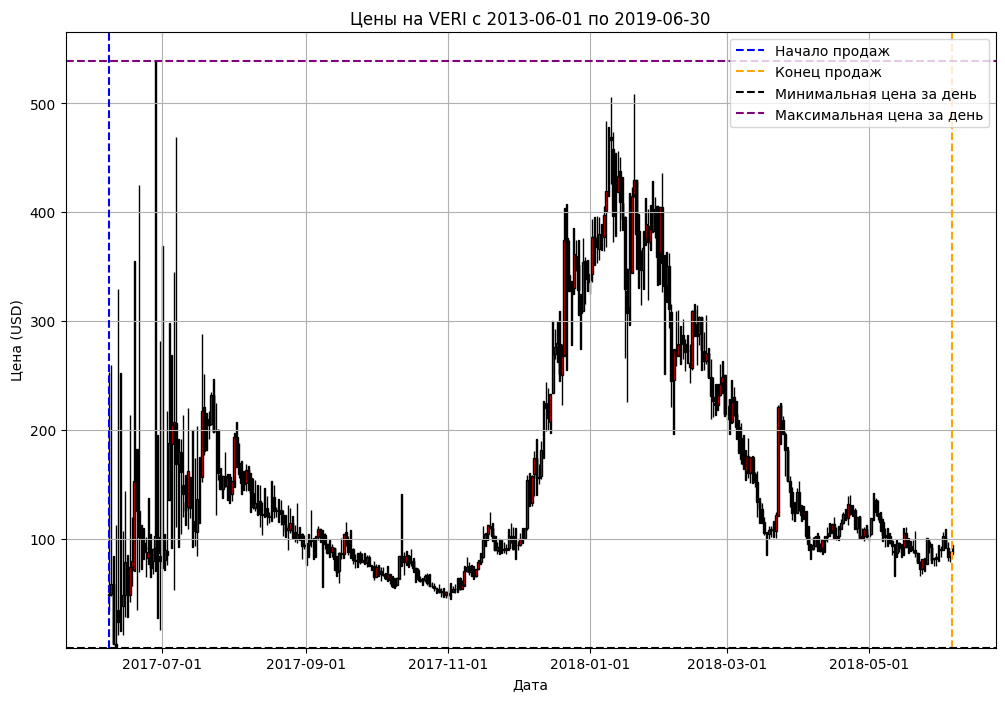

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
  # Paste your code here
  selected_coin_data = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)].copy()
  selected_coin_data['pnd'] = selected_coin_data['high'] / selected_coin_data[['open', 'close']].max(axis=1)
  max_pnd_day = selected_coin_data.loc[selected_coin_data['pnd'].idxmax()]
  return max_pnd_day['date'], max_pnd_day['pnd']

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', 1.1428940004366206)

Сравните эти значения для разных монет:

In [ ]:
print('ETH: ', find_most_severe_pump_and_dump(coins, symbol='ETH', start_date='2017-06-01', end_date='2018-06-01'))
print('ADA: ', find_most_severe_pump_and_dump(coins, symbol='ADA', start_date='2017-06-01', end_date='2018-06-01'))
print('ETC: ', find_most_severe_pump_and_dump(coins, symbol='ETC', start_date='2017-06-01', end_date='2018-06-01'))
print('BNB: ', find_most_severe_pump_and_dump(coins, symbol='BNB', start_date='2017-06-01', end_date='2018-06-01'))

ETH:  ('2017-07-18', 1.1433508255471652)
ADA:  ('2017-10-01', 1.2906403940886697)
ETC:  ('2017-12-19', 1.1482493171095107)
BNB:  ('2017-12-26', 1.176079734219269)


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [171]:
def compute_roi(coins, investments, start_date, end_date):
    # Paste your code here
    selected_data = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date)].copy()
    start_data = selected_data.loc[start_date]
    end_data = selected_data.loc[end_date]
    roi_elem = 0
    roi = 0
    part = 0
    for coin, investment_amount in investments.items():
      price_startday = start_data[start_data['symbol'] == coin]['price'].values[0]
      # print(f'Price of {coin} in start_date: {price_startday}')
      price_endday = end_data[end_data['symbol'] == coin]['price'].values[0]
      # print(f'Price of {coin} in end_date: {price_endday}')
      part = investment_amount / price_startday
      roi_elem = (part * price_endday - investment_amount) / investment_amount
      # print(f'roi for {coin} = {roi_elem}')
      roi += roi_elem
    print(f'total roi of briefcase = {roi}')
    return roi

In [172]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

total roi of briefcase = -0.11264725497092513


-0.11264725497092513

In [173]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

total roi of briefcase = 96.08463186729873


96.08463186729873

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [118]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here
    coin_data = coins[coins['symbol'] == symbol].copy()

    # Рассчитываем скользящее среднее и стандартное отклонение
    coin_data['MA'] = coin_data['price'].rolling(window=window).mean()
    coin_data['upper_band'] = coin_data['MA'] + width * coin_data['price'].rolling(window=window).std()
    coin_data['lower_band'] = coin_data['MA'] - width * coin_data['price'].rolling(window=window).std()

    # Построение графика
    plt.figure(figsize=(12, 8))
    plt.plot(coin_data['date'], coin_data['price'], label='Цена', color='blue')
    plt.plot(coin_data['date'], coin_data['MA'], label=f'Скользящее среднее ({window} дней)', linestyle='--', color='orange')
    plt.plot(coin_data['date'], coin_data['upper_band'], label=f'Верхняя граница Боллинджера', linestyle='--', color='green')
    plt.plot(coin_data['date'], coin_data['lower_band'], label=f'Нижняя граница Боллинджера', linestyle='--', color='red')

    # Подписи и легенда
    plt.title(f'График цены с границами Боллинджера для монеты {symbol}')
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.legend(loc='best')

    # Включение сетки
    plt.grid(True)

    # Показываем график
    plt.show()

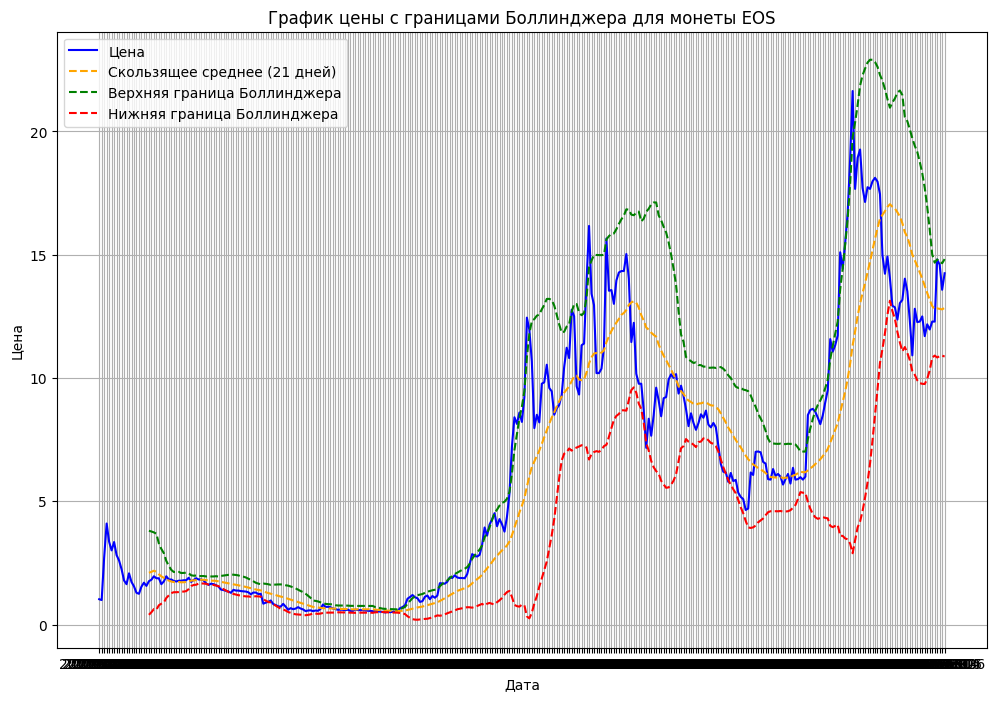

In [119]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ответ тут**

***Если за правило считать "график касаясь границы от него должен отражаться", то в некоторых местах да оно выполняется***

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [238]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here
    selected_data = coins[(coins['symbol'].isin(symbols)) & (coins['date'] >= start_date)]
    average_market = selected_data.groupby('symbol')['market'].mean()
    plt.figure(figsize=(10, 6))
    bars = plt.bar(average_market.index, average_market.values, color='blue')
    plt.xlabel('Coins')
    plt.ylabel('Market Capitalization')
    plt.title('')
    plt.yscale('log')
    for bar, value in zip(bars, average_market):
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value/1e9:.2f}B',
               ha='center', va='bottom', fontsize=8, color='black')
    plt.show()

In [246]:
def plot_coins_shares(coins, symbols, start_date):
    # Filter the DataFrame based on start date and selected coins
    filtered_df = coins[(coins['date'] >= start_date) & (coins['symbol'].isin(symbols))]
    other_coins = set(coins['symbol'].unique()) - set(symbols)
    total_market_cap = coins['market'].sum()
    coin_market_caps = filtered_df.groupby('symbol')['market'].sum()
    coin_market_shares = (coin_market_caps / total_market_cap) * 100
    coin_market_shares = coin_market_shares.sort_values(ascending=False)
    if other_coins:
        other_market_cap = coins[coins['symbol'].isin(other_coins)]['market'].sum()
        other_share = (other_market_cap / total_market_cap) * 100
        coin_market_shares['Others'] = other_share

    # Plot the market capitalization shares
    plt.figure(figsize=(10, 6))
    colors = plt.cm.Paired(range(len(coin_market_shares)))

    plt.bar(coin_market_shares.index, coin_market_shares, color=colors)
    plt.xlabel('Монеты')
    plt.ylabel('Доля рынка (%)')
    plt.title('Доли капитализаций этих монет от общей капитализации рынка')
    for coin, share in zip(coin_market_shares.index, coin_market_shares):
        plt.text(coin, share, f'{share:.2f}%', ha='center', va='bottom', fontsize=8, color='black')
    plt.show()


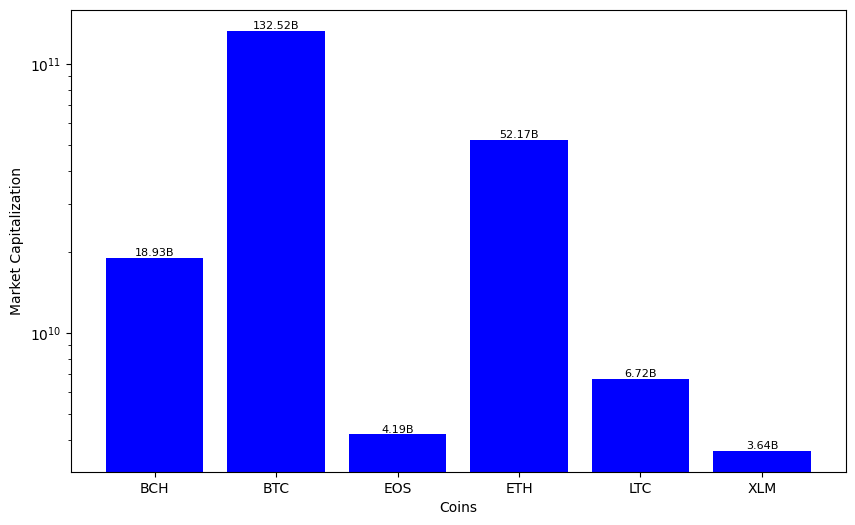

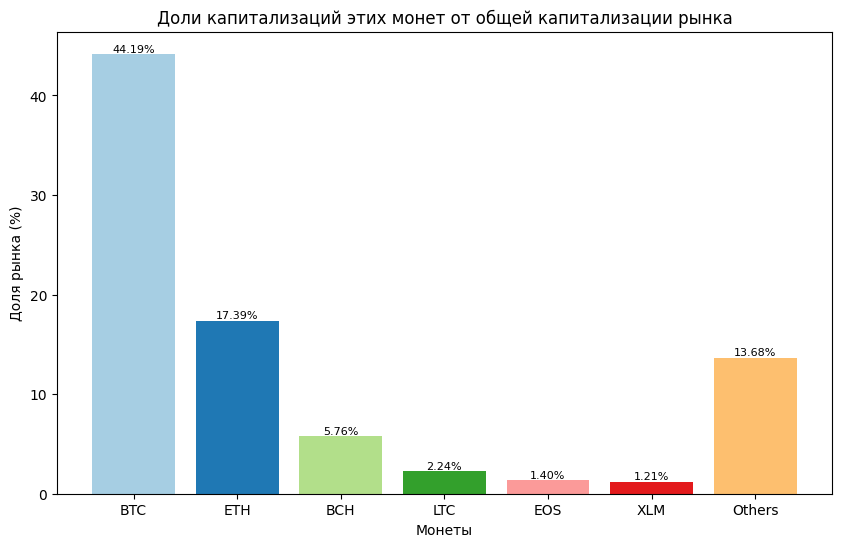

In [247]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

plot_coins_shares(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

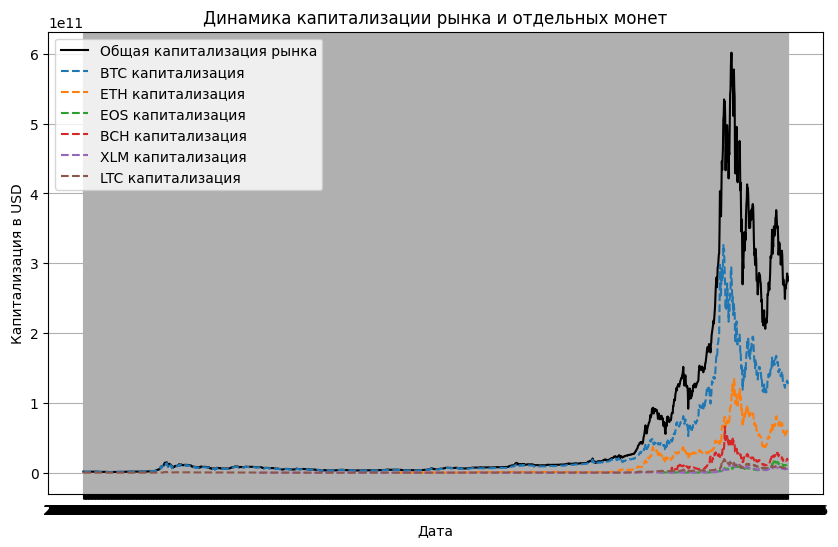

In [248]:
total_market_cap = coins.groupby('date')['market'].sum()
# Создаем словарь для хранения данных о доле капитализации каждой монеты
market_cap_by_coin = {}

# Список монет для анализа
coins_to_analyze = ['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC']

# Рассчитываем долю капитализации для каждой монеты
for coin in coins_to_analyze:
    coin_market_cap = coins[coins['symbol'] == coin].groupby('date')['market'].sum()
    market_cap_by_coin[coin] = coin_market_cap

# Построение графика общей капитализации
plt.figure(figsize=(10, 6))
plt.plot(total_market_cap, label='Общая капитализация рынка', color='black')

# Построение графика доли капитализации каждой монеты
for coin, market_cap in market_cap_by_coin.items():
    plt.plot(market_cap, label=f'{coin} капитализация', linestyle='--')

plt.legend()
plt.title('Динамика капитализации рынка и отдельных монет')
plt.xlabel('Дата')
plt.ylabel('Капитализация в USD')
plt.grid(True)
plt.show()

 **Ваш ответ тут**
 С помощью этого графика видна зависимость

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [296]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here
    pass

In [297]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

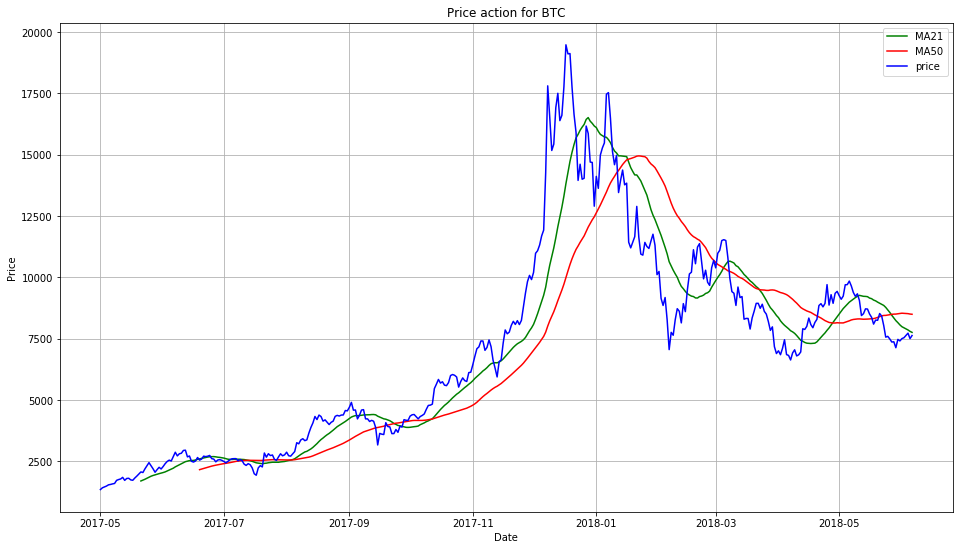

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.